In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter, savgol_filter

In [2]:
processed_data_path = "../../Data/Processed/18-03-2021Test.csv"

In [4]:
df = pd.read_csv(processed_data_path)

In [5]:
df.head()

,Unnamed: 0,realAltitude,kalmanAltitude
0,0,1547.21,1537.69
1,1,1546.92,1543.41
2,2,1546.92,1544.83
3,3,1546.54,1545.33
4,4,1547.21,1545.76


In [6]:
df.drop("Unnamed: 0", inplace=True, axis=1)
df.head()

,realAltitude,kalmanAltitude
0,1547.21,1537.69
1,1546.92,1543.41
2,1546.92,1544.83
3,1546.54,1545.33
4,1547.21,1545.76


In [7]:
df.shape

(2299, 2)

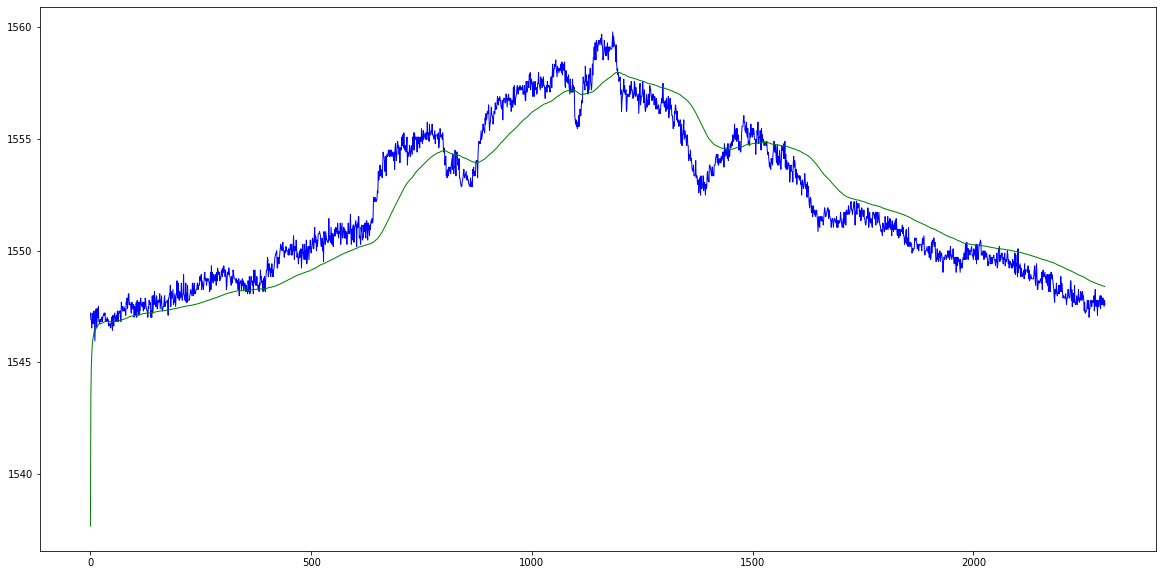

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['realAltitude'],  linewidth=1, color="b")
plt.plot(df.index, df['kalmanAltitude'],  linewidth=1, color="g")
plt.show()

## R squared
It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

In [16]:
from sklearn.metrics import r2_score


print(r2_score(df['realAltitude'], df['kalmanAltitude']))

0.8888464713312432


There may be complex and unknown relationships between the variables in your dataset.

It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

In this tutorial, you will discover that correlation is the statistical summary of the relationship between variables and how to calculate it for different types variables and relationships.

After completing this tutorial, you will know:

How to calculate a covariance matrix to summarize the linear relationship between two or more variables.
How to calculate the Pearson’s correlation coefficient to summarize the linear relationship between two variables.
How to calculate the Spearman’s correlation coefficient to summarize the monotonic relationship between two variables.

Variables within a dataset can be related for lots of reasons.

For example:

One variable could cause or depend on the values of another variable.
One variable could be lightly associated with another variable.
Two variables could depend on a third unknown variable.
It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions.
The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

We may also be interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model.

The structure of the relationship may be known, e.g. it may be linear, or we may have no idea whether a relationship exists between two variables or what structure it may take. Depending what is known about the relationship and the distribution of the variables, different correlation scores can be calculated.

In this tutorial, we will look at one score for variables that have a Gaussian distribution and a linear relationship and another that does not assume a distribution and will report on any monotonic (increasing or decreasing) relationship.

## Pearson’s Correlation
The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
1
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

The pearsonr() SciPy function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.

We can calculate the correlation between the two variables in our test problem.

The complete example is listed below.

In [17]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(df['realAltitude'], df['kalmanAltitude'])

print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.944


## Spearman’s Correlation
Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
1
Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.

The spearmanr() SciPy function can be used to calculate the Spearman’s correlation coefficient between two data samples with the same length.

We can calculate the correlation between the two variables in our test problem.

The complete example is listed below.

In [18]:
from scipy.stats import spearmanr

# calculate spearman's correlation
corr, _ = spearmanr(df['realAltitude'], df['kalmanAltitude'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.944


In [19]:
from scipy.stats import kendalltau

# calculate spearman's correlation
corr, _ = kendalltau(df['realAltitude'], df['kalmanAltitude'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.794
